# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

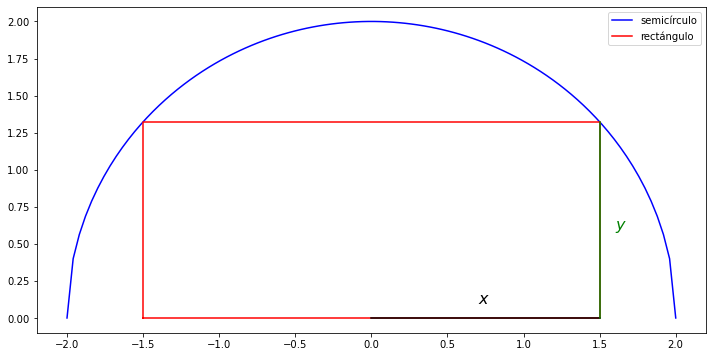

In [95]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

In [96]:
import numpy as np
import sympy as sp

## Solución:

Se desea maximizar el área del rectángulo $A_R(x,y)$

El área del rectángulo es $ A_R(x, y) = 2xy $

Donde tenemos la siguiente restricción $ x^2 + y^2 = r^2 $ donde $ r = 2 $

Variables del problema

- x (tenemos control de esta variable)
- y (tenemos control de esta variable)
- Área del círculo
- Área del cuadrado
- radio

In [97]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp

In [98]:
x = sp.var('x')
y = sp.var('y')

def restriccion_de_circulo(x, y, r) :
    return x**2 + y**2 - r**2

restriccion_de_circulo(x, y, 2)

x**2 + y**2 - 4

In [99]:
def AR(x, y) :
    return 2*x*y
AR(x, y)

2*x*y

In [100]:
sp.solve(restriccion_de_circulo(x, y, 2), x) # Resolver la ecuación con respecto de x

[-sqrt(4 - y**2), sqrt(4 - y**2)]

In [101]:
sol_x = sp.solve(restriccion_de_circulo(x, y, 2), x)[1] # Sympy, despeja esta ecuación respecto a x
sol_x # EL [1] es para que nos de el resultado positivo

sqrt(4 - y**2)

In [102]:
AR_y = AR(x, y).subs(x, sol_x)
AR_y

2*y*sqrt(4 - y**2)

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [103]:
dAR = sp.diff(AR_y, y)
dAR

-2*y**2/sqrt(4 - y**2) + 2*sqrt(4 - y**2)

In [104]:
pc = sp.solve(dAR, y)[1] # EL [1] es para que nos de el resultado positivo
pc

sqrt(2)

In [105]:
yn = np.linspace(0, 2, 200)

# Método 1: Reescribiendo la funcion a mano
def AreaRectanguloY (y) :
    return 2*y*np.sqrt(4 - y**2)
area = AreaRectanguloY(yn) # Cada vector de area corresponde a un vector de y

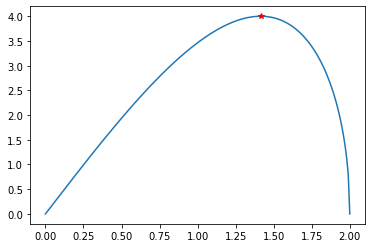

In [106]:
plt.figure()
plt.plot(yn, area)
plt.plot(np.sqrt(2), AreaRectanguloY(np.sqrt(2)), '*r')

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [107]:
sol_x

sqrt(4 - y**2)

In [108]:
b = 2*sol_x.subs(y, np.sqrt(2)) # Base (b) = 2 veces x (sol_x) sustituyendo el valor de raíz de 2 en y
b

2.82842712474619

In [109]:
h = np.sqrt(2)

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [110]:
import pandas as pd

In [111]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

$ x_i $ es el número de día

## Solución:

1. Criterios a optimizar: Minimizar (min) cantidad de trabajadores 

2.  Información pertinente del problema a optimizar: trabajan 5 días y descansan 2 días

3.  Definir variables de optimización
- $x_1$ Trabajadores que empiezan el lunes y descansa sábado y domingo
- $x_2$ Trabajadores que empiezan el martes y descansa domingo y lunes
- $x_3$ Trabajadores que empiezan el miércoles y descansa lunes y martes
- $x_4$ Trabajadores que empiezan el jueves y descansa martes y miércoles
- $x_5$ Trabajadores que empiezan el viernes y descansa miércoles y jueves
- $x_6$ Trabajadores que empiezan el sábado y descansa jueves y viernes
- $x_7$ Trabajadores que empiezan el domingo y descansa viernes y sábado

4. Restricciones
- $x_1 + x_4 + x_5 + x_6 + x_7 \geq 14 $
- $x_2 + x_5 + x_6 + x_7 + x_1 \geq 13 $
- $x_3 + x_6 + x_7 + x_1 + x_2 \geq 15 $
- $x_4 + x_7 + x_1 + x_2 + x_3 \geq 16 $
- $x_5 + x_1 + x_2 + x_3 + x_4 \geq 19 $
- $x_6 + x_2 + x_3 + x_4 + x_5 \geq 18 $
- $x_7 + x_3 + x_4 + x_5 + x_6 \geq 11 $

5. Álgebra

In [112]:
c = np.array([1, # trabajadores que empiezan el lunes
              1, # trabajadores que empiezan el martes
              1, # trabajadores que empiezan el miércoles
              1, # trabajadores que empiezan el jueves
              1, # trabajadores que empiezan el viernes
              1, # trabajadores que empiezan el sábado
              1  # trabajadores que empiezan el domingo
]) # el orden de los renglones de c debe hacer match con las columnas de A y con la función de costo


A = np.array([
    [-1, -0, -0, -1, -1, -1, -1], # Lunes
    [-1, -1, -0, -0, -1, -1, -1], # Martes
    [-1, -1, -1, -0, -0, -1, -1], # Miércoles
    [-1, -1, -1, -1, -0, -0, -1], # Jueves
    [-1, -1, -1, -1, -1, -0, -0], # Viernes
    [-0, -1, -1, -1, -1, -1, -0], # Sábado
    [-0, -0, -1, -1, -1, -1, -1] # Domingo
])

b = np.array([-14, # Lunes
              -13, # Martes
              -15, # Miércoles
              -16, # Jueves
              -19, # Viernes
              -18, # Sábado
              -11])# Domingo


In [113]:

import scipy.optimize as opt
sol = opt.linprog(c, A, b)
sol

     con: array([], dtype=float64)
     fun: 21.9999999997342
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-1.63190350e-10,  1.26363074e+00, -1.84012805e-10,  1.01456976e+00,
       -2.30514274e-10, -2.43439047e-10,  1.72179950e+00])
  status: 0
 success: True
       x: array([4.00000000e+00, 5.27820050e+00, 2.72179950e+00, 5.01456976e+00,
       1.98543024e+00, 3.00000000e+00, 2.37512593e-11])

In [114]:
# Con solución de método de simplex
solucion = opt.linprog(c, A, b, method = "simplex")
solucion

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 4., 0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 7., 1., 4., 3., 3., 0.])

Se necesitan mínimo **22 trabajadores** para satisfacer la demanda del restaurante


**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Salarios_minimos.csv')

In [116]:
data

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

#### Parte 1. Regresión Lineal

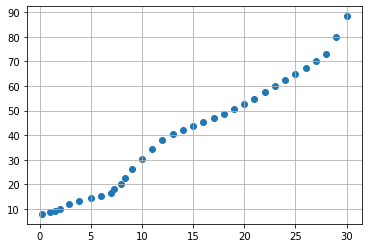

In [133]:
x = data["Periodo"] - 1988
y = data["Salario"]
plt.figure()
plt.scatter(x, y)
plt.grid()

In [118]:
x

0      0.25
1      1.00
2      1.50
3      2.00
4      2.84
5      3.84
6      5.00
7      6.00
8      7.00
9      7.30
10     8.00
11     8.30
12     9.00
13    10.00
14    11.00
15    12.00
16    13.00
17    14.00
18    15.00
19    16.00
20    17.00
21    18.00
22    19.00
23    20.00
24    21.00
25    22.00
26    23.00
27    24.00
28    25.00
29    26.00
30    27.00
31    28.00
32    29.00
33    30.00
Name: Periodo, dtype: float64

In [136]:
def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, -1])
    pred = X @ beta
    costo = (y - pred).T @ (y - pred)
    return costo[0][0]

In [137]:
m = len(y)
ones = np.ones([m, 1])
x_1 = np.reshape(list(x), [m, -1])
X = np.hstack( (ones, x_1) )

beta_inicial = np.random.rand(2)
y = np.reshape(list(y), [m, -1])

In [138]:
sol1 = opt.minimize(funcion_de_costo, 
                    beta_inicial, 
                    args = (X, y))
sol1

      fun: 276.88722086932273
 hess_inv: array([[ 0.05133885, -0.00258391],
       [-0.00258391,  0.00018226]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([3.71557826, 2.52832882])

In [140]:
x_2 = np.reshape(x_1**2, [m, -1])
X2 = np.hstack((ones, x_1, x_2))
beta_inicial_2 = np.random.rand(3)
sol2 = opt.minimize (funcion_de_costo, 
                     beta_inicial_2, 
                     args = (X2, y))
sol2

      fun: 258.5544374958982
 hess_inv: array([[ 1.08572512e-01, -1.48043056e-02,  4.11875220e-04],
       [-1.48043056e-02,  2.79152696e-03, -8.79426381e-05],
       [ 4.11875220e-04, -8.79426381e-05,  2.96401090e-06]])
      jac: array([-3.81469727e-06, -3.81469727e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([5.1641689 , 2.21902908, 0.01042461])

In [143]:
x_3 = np.reshape(x_1**3, [m, -1])
X3 = np.hstack((ones, x_1, x_2, x_3))
beta_inicial_3 = np.random.rand(4)
sol3 = opt.minimize(funcion_de_costo,
                    beta_inicial_3, 
                    args = (X3, y))
sol3

      fun: 254.08498927450032
 hess_inv: array([[ 1.77671114e-01, -4.47144367e-02,  2.97582183e-03,
        -5.74986329e-05],
       [-4.47144367e-02,  1.57448394e-02, -1.19841755e-03,
         2.49039365e-05],
       [ 2.97582183e-03, -1.19841755e-03,  9.81653720e-05,
        -2.13503145e-06],
       [-5.74986329e-05,  2.49039365e-05, -2.13503145e-06,
         4.78813000e-08]])
      jac: array([-4.76837158e-05, -3.43322754e-05,  9.53674316e-06,  4.57763672e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 9
     njev: 42
   status: 2
  success: False
        x: array([ 4.38104456e+00,  2.55802967e+00, -1.86353135e-02,  6.51694260e-04])

#### Parte 2. Graficar polinomios

In [149]:
y_pred1 = X @ sol1.x

In [150]:
y_pred2 = X2 @ sol2.x

In [151]:
y_pred3 = X3 @ sol3.x

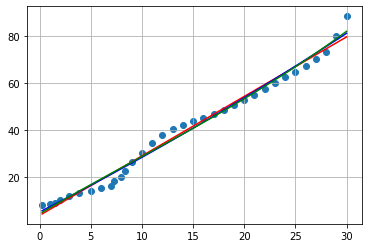

In [152]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred1, "r")
plt.plot(x, y_pred2, "b")
plt.plot(x, y_pred3, "g")
plt.grid()

#### Parte 3. Graficar error cuadrático contra número de términos

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.